In [1]:
import cudaq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
cudaq.set_target('nvidia')

In [2]:
kernel = cudaq.make_kernel()
qd = kernel.qalloc(9)
qs = kernel.qalloc(8)

for round in range(1):

    # Step 1 - Reset all stabilizers
    # for i in range(1):
    #     kernel.reset(qs[i])

    # Step 2 - Perform H on X-stabilizers
    kernel.h(qs[0])
    kernel.h(qs[1])
    kernel.h(qs[2])
    kernel.h(qs[3])

    # NE
    kernel.cx(qs[0], qd[2])
    kernel.cx(qs[1], qd[4])
    kernel.cx(qs[2], qd[8])
    kernel.cx(qd[3], qs[4])
    kernel.cx(qd[5], qs[5])
    kernel.cx(qd[7], qs[6])

    # NW
    kernel.cx(qs[0], qd[1])
    kernel.cx(qs[1], qd[3])
    kernel.cx(qs[2], qd[7])
    kernel.cx(qd[4], qs[5])
    kernel.cx(qd[6], qs[6])
    kernel.cx(qd[8], qs[7])

    # SE
    kernel.cx(qs[1], qd[1])
    kernel.cx(qs[2], qd[5])
    kernel.cx(qs[3], qd[7])
    kernel.cx(qd[0], qs[4])
    kernel.cx(qd[2], qs[5])
    kernel.cx(qd[4], qs[6])

    # SW
    kernel.cx(qs[1], qd[0])
    kernel.cx(qs[2], qd[4])
    kernel.cx(qs[3], qd[6])
    kernel.cx(qd[1], qs[5])
    kernel.cx(qd[3], qs[6])
    kernel.cx(qd[5], qs[7])

    kernel.h(qs[0])
    kernel.h(qs[1])
    kernel.h(qs[2])
    kernel.h(qs[3])

state = np.array(cudaq.get_state(kernel))
state2 = np.square(np.abs(state))

print(state[0])

    #kernel.mz(qs, f"round{round}")
#kernel.mz(qd, 'data')
#results = cudaq.sample(kernel, shots_count=1)

(0.0624999925494194+0j)


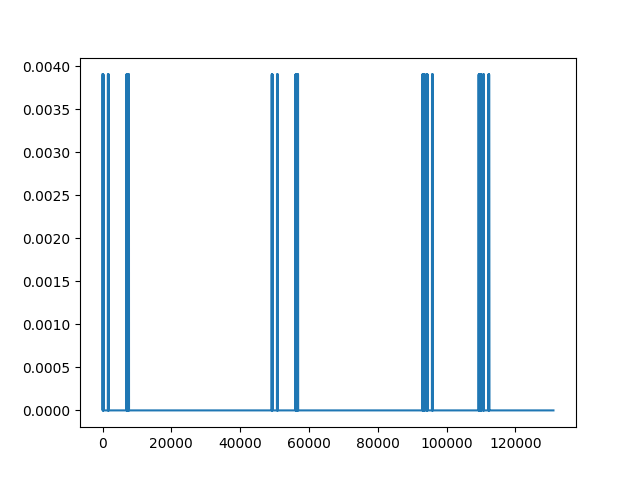

In [3]:
plt.plot(state2)

In [10]:
np.sum(state2>0)

256

In [4]:
print(len(results))
print(results)
results_m1 = results.get_register_counts("data")
#for bits in results:
#    print(bits, results[bits], bits[0:9].count('1') % 2)
mydat = [0 for _ in range(10)]
for bits in results_m1:
    #print(f"mydat[{bits[0:9].count('1')}] += 1")
    mydat[bits[0:9].count('1')] += results_m1[bits]
print(mydat)

NameError: name 'results' is not defined